In [2]:
import pandas as pd

df_union_sep = pd.read_csv('/content/df_union sep.csv')

Creamos una copia sin id y sin datos faltantes

In [3]:
df_union_copy = df_union_sep.drop(columns=['hash_sha256_num', 'id_fecha'])
display(df_union_copy.head())

,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,Nivel del Sisbén,Grupo poblacional del afiliado,Cantidad de registros,Fecha de actualización
0,Femenino,1 a 5,EPS037,NUEVA EPS S.A.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,BETULIA,N,VÍCTIMAS DEL CONFLICTO ARMADO INTERNO,2,2025-09-06 22:28:56
1,Masculino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,HUILA,PITALITO,1,POBLACIÓN CON SISBEN,2,2025-09-06 22:28:56
2,Femenino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,BOYACA,SOGAMOSO,0,NaN,13,2025-09-06 22:28:56
3,Femenino,50 a 55,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CORDOBA,LA APARTADA,0,NaN,3,2025-09-06 22:28:56
4,Femenino,60 a 65,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CUNDINAMARCA,ARBELAEZ,1,POBLACIÓN CON SISBEN,1,2025-09-06 22:28:56


In [4]:
df_union_copy = df_union_copy.drop(columns=['Grupo poblacional del afiliado', 'Cantidad de registros', 'Fecha de actualización'], errors='ignore')
df_union_copy.dropna(inplace=True)
print(df_union_copy.isnull().sum())

Género                        0
Grupo etario                  0
Código de la entidad          0
Nombre de la entidad          0
Régimen                       0
Tipo de afiliado              0
Estado del afiliado           0
Condición del beneficiario    0
Zona de Afiliación            0
Departamento                  0
Municipio                     0
Nivel del Sisbén              0
dtype: int64


In [ ]:
print(df_union_copy.dtypes)

Género                        object
Grupo etario                  object
Código de la entidad          object
Nombre de la entidad          object
Régimen                       object
Tipo de afiliado              object
Estado del afiliado           object
Condición del beneficiario    object
Zona de Afiliación            object
Departamento                  object
Municipio                     object
Nivel del Sisbén              object
dtype: object


In [ ]:
display(df_union_copy.head())

,Género,Grupo etario,Código de la entidad,Nombre de la entidad,Régimen,Tipo de afiliado,Estado del afiliado,Condición del beneficiario,Zona de Afiliación,Departamento,Municipio,Nivel del Sisbén
0,Femenino,1 a 5,EPS037,NUEVA EPS S.A.,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,ANTIOQUIA,BETULIA,N
1,Masculino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,HUILA,PITALITO,1
2,Femenino,15 a 19,EPS041,NUEVA EPS S.A. -CM,Contributivo,BENEFICIARIO,Activo,NO APLICA,Urbana,BOYACA,SOGAMOSO,0
3,Femenino,50 a 55,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CORDOBA,LA APARTADA,0
4,Femenino,60 a 65,EPS037,NUEVA EPS S.A.,Contributivo,COTIZANTE,Activo,NO APLICA,Urbana,CUNDINAMARCA,ARBELAEZ,1


<Axes: title={'center': 'Distribución de los regímenes'}, xlabel='Régimen'>

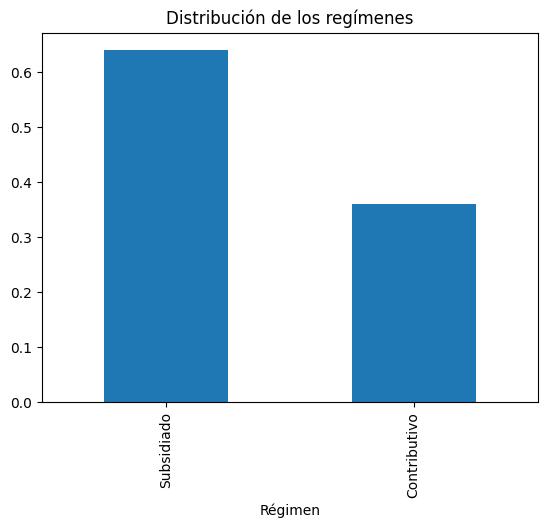

In [ ]:
df_union_copy['Régimen'].value_counts(normalize=True).plot(kind='bar', title='Distribución de los regímenes')

| Régimen          | Participación | Interpretación socioeconómica                                                         |
| ---------------- | ------------- | ------------------------------------------------------------------------------------- |
| **Subsidiado**   | ~64%          | Mayor presencia de población en condiciones de vulnerabilidad o informalidad laboral. |
| **Contributivo** | ~36%          | Menor proporción de trabajadores formales o con ingresos estables.                    |


In [5]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.decomposition import TruncatedSVD
from sklearn.pipeline import Pipeline

df = df_union_copy.copy()

y = df['Régimen']
X = df.drop(columns=['Régimen'])

# (opcional) reducir cardinalidad: top-N por columna
def topN_or_other(s, N=50):
    top = s.value_counts().nlargest(N).index
    return s.where(s.isin(top), other='__OTRO__')

high_card_cols = [c for c in X.columns if X[c].nunique() > 60]   # ajusta el umbral
for c in high_card_cols:
    X[c] = topN_or_other(X[c], N=60)

# codificación esparcida y tipo chico
ohe = OneHotEncoder(handle_unknown='ignore', sparse_output=True, dtype=np.int8)

# reducción tipo “PCA para sparse” (MCA aproximado)
svd = TruncatedSVD(n_components=2, random_state=42)

pipe = Pipeline([
    ('enc', ohe),
    ('svd', svd),   # entrega 2 componentes para graficar/analizar
])

X_svd = pipe.fit_transform(X)

#2) Visualización/diagnóstico con muestra estratificada

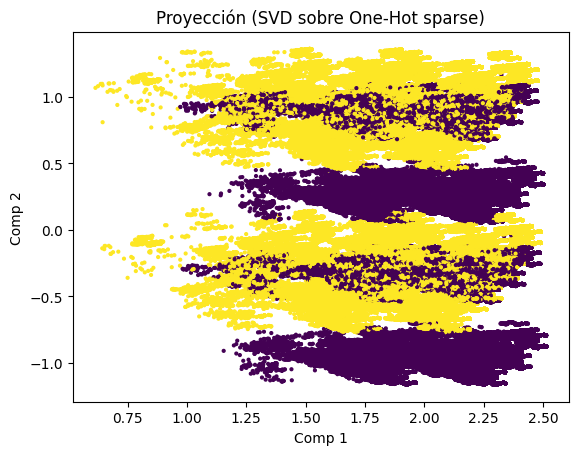

In [6]:
from sklearn.model_selection import StratifiedShuffleSplit

sss = StratifiedShuffleSplit(n_splits=1, test_size=50000, random_state=42) # ajusta tamaño
idx_train, _ = next(sss.split(df, y))
df_sample = df.iloc[idx_train].reset_index(drop=True)

y_s = df_sample['Régimen']
X_s = df_sample.drop(columns=['Régimen'])

for c in [c for c in X_s.columns if X_s[c].nunique() > 60]:
    X_s[c] = topN_or_other(X_s[c], N=60)

X_svd = Pipeline([('enc', ohe), ('svd', svd)]).fit_transform(X_s)

# ejemplo de scatter
import matplotlib.pyplot as plt
import pandas as pd
h = pd.factorize(y_s)[0]
plt.scatter(X_svd[:,0], X_svd[:,1], c=h, s=4)
plt.title('Proyección (SVD sobre One-Hot sparse)'); plt.xlabel('Comp 1'); plt.ylabel('Comp 2')
plt.show()

| Observación            | Interpretación                                            |
| ---------------------- | --------------------------------------------------------- |
| Colores bien separados | Alta diferenciación entre regímenes                       |
| Bandas horizontales    | Estratos o grupos definidos por combinaciones categóricas |
| Zonas de mezcla        | Áreas donde ambos regímenes comparten características     |
| Poca dispersión        | Variables explican bien el comportamiento del régimen     |


#3) Fuerza de asociación  (χ² / Cramer’s V)

In [7]:
import numpy as np
from scipy.stats import chi2_contingency

def cramers_v(x, y):
    tab = pd.crosstab(x, y)
    chi2 = chi2_contingency(tab, correction=False)[0]
    n = tab.to_numpy().sum()
    r, k = tab.shape
    phi2 = chi2 / n
    phi2_corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    r_corr = r - ((r-1)**2)/(n-1)
    k_corr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2_corr / min((k_corr-1), (r_corr-1)))

scores = {c: cramers_v(df[c], df['Régimen']) for c in df.columns if c!='Régimen'}
pd.Series(scores).sort_values(ascending=False)

,0
Código de la entidad,0.999983
Tipo de afiliado,0.766364
Nombre de la entidad,0.673055
Nivel del Sisbén,0.578552
Estado del afiliado,0.217868
Municipio,0.134788
Zona de Afiliación,0.125388
Condición del beneficiario,0.121343
Grupo etario,0.117238
Departamento,0.092710


| Variable                               | Valor (θ)                                                                                                                                                                                                                                           | Interpretación |
| -------------------------------------- | --------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------- | -------------- |
| **Código de la entidad (0.999983)**    | Asociación casi perfecta. El tipo de **EPS** (entidad prestadora) prácticamente determina el régimen. En la base, cada régimen parece estar ligado a un conjunto específico de códigos de entidad (por ejemplo, EPS subsidiadas vs. contributivas). |                |
| **Tipo de afiliado (0.766)**           | Asociación fuerte. El tipo de afiliado (Cotizante o Beneficiario) tiene una gran influencia: los **cotizantes** suelen pertenecer al **régimen contributivo**, y los **beneficiarios** o **subsidiados** al **régimen subsidiado**.                 |                |
| **Nombre de la entidad (0.673)**       | Asociación fuerte. Similar al código, indica que ciertas **EPS** operan en un régimen específico.                                                                                                                                                   |                |
| **Nivel del Sisbén (0.579)**           | Asociación fuerte. Los **niveles bajos del Sisbén (0, 1, 2)** se asocian con el **régimen subsidiado**, mientras que niveles altos o ausencia de Sisbén con el **contributivo**.                                                                    |                |
| **Estado del afiliado (0.218)**        | Asociación débil-moderada. El estado (activo/inactivo) tiene algún efecto, pero no determina el régimen.                                                                                                                                            |                |
| **Municipio (0.135)**                  | Asociación débil. Hay diferencias regionales, pero no son determinantes del régimen.                                                                                                                                                                |                |
| **Zona de Afiliación (0.126)**         | Asociación débil. Aunque el régimen subsidiado puede tener más afiliados rurales, la variable no explica por sí sola el régimen.                                                                                                                    |                |
| **Condición del beneficiario (0.121)** | Asociación débil. Puede reforzar lo que ya explica el tipo de afiliado.                                                                                                                                                                             |                |
| **Grupo etario (0.117)**               | Asociación débil. La edad influye ligeramente, pero no define el régimen.                                                                                                                                                                           |                |
| **Departamento (0.093)**               | Asociación débil. Existen diferencias geográficas marginales.                                                                                                                                                                                       |                |
| **Género (0.009)**                     | Sin asociación. El sexo no influye en el régimen de afiliación.                                                                                                                                                                                     |                |


#4) Modelo explicativo

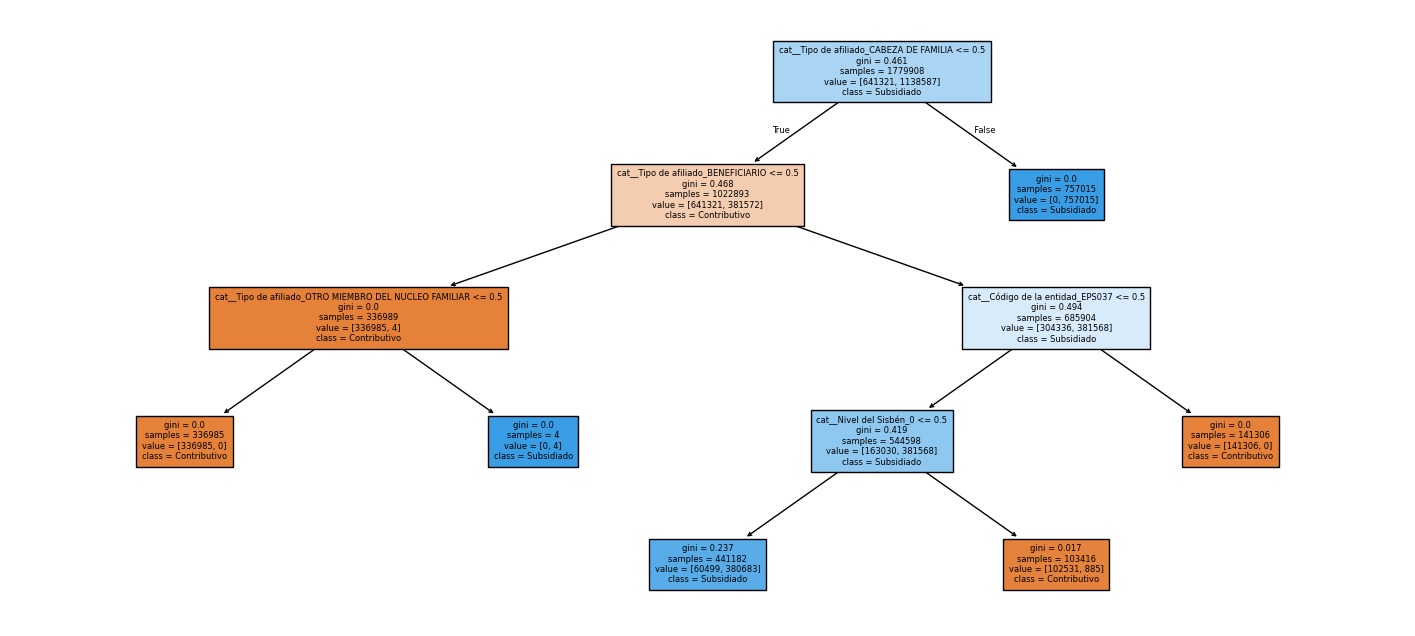

In [9]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

X = df_union_copy.drop(columns=['Régimen'])
y = df_union_copy['Régimen']

categorical_features = X.columns.tolist()
encoder = ColumnTransformer(transformers=[('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features)])

tree = DecisionTreeClassifier(max_depth=4, random_state=42)

pipe = Pipeline(steps=[('encoder', encoder), ('tree', tree)])
pipe.fit(X, y)

plt.figure(figsize=(18,8))
plot_tree(tree, filled=True, feature_names=pipe['encoder'].get_feature_names_out(), class_names=pipe.classes_, fontsize=6)
plt.show()

| Nivel del árbol | Variable                              | Rol explicativo               | Régimen asociado                                                                |
| --------------- | ------------------------------------- | ----------------------------- | ------------------------------------------------------------------------------- |
| 1               | Tipo de afiliado                      | Eje principal del modelo      | Define el tipo de participación (cotizante / beneficiario / cabeza de familia). |
| 2               | Código de la entidad (EPS)            | Segmenta por institución      | EPS distintas operan en distintos regímenes.                                    |
| 3               | Nivel del Sisbén                      | Determina condición económica | Niveles bajos → subsidiado.                                                     |
| 4               | Condiciones específicas de afiliación | Ajustes menores               | Diferencian casos residuales.                                                   |
